# EECS 531: Computer Vision Assignment 2
**David Fan**

3/16/18

# Exercise 1

## Background
The two-dimensional discrete cosine transform (DCT) represents an image as a sum of sinusoids. The two-dimensional DCT of an M-by-N matrix A is defined as follows:

$${
B_{pq} = \alpha_p \alpha_q \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} A_{mn} cos \frac{\pi (2m+1)p}{2M} cos \frac{\pi (2n+1)q}{2N},\begin{array}{c} 0 \leq p \leq M-1 \\ 0 \leq q \leq N-1 \end{array}}
$$ 

$${
    \alpha_p = \left\{\begin{array}{lr}
        1/\sqrt{M}, & p=0\\
        \sqrt{2/M}, & 1 \leq p \leq M-1
        \end{array}\right. 
        \;\; \alpha_q = \left\{\begin{array}{lr}
        1/\sqrt{N}, & q=0\\
        \sqrt{2/N}, & 1 \leq q \leq N-1
        \end{array}\right. 
}
$$

The DCT can be inverted to give:

$${
A_{mn} = \sum_{p=0}^{M-1}\sum_{q=0}^{N-1}\alpha_p\alpha_q\beta_{pq} cos \frac{\pi (2m+1)p}{2M} cos \frac{\pi (2n+1)q}{2N},\begin{array}{c}
0 \leq m \leq M-1 \\ 0 \leq n \leq N-1
\end{array}
}$$

$${
    \alpha_p = \left\{\begin{array}{lr}
        1/\sqrt{M}, & p=0\\
        \sqrt{2/M}, & 1 \leq p \leq M-1
        \end{array}\right. 
        \;\; \alpha_q = \left\{\begin{array}{lr}
        1/\sqrt{N}, & q=0\\
        \sqrt{2/N}, & 1 \leq q \leq N-1
        \end{array}\right. 
}
$$

This can be interpreted as meaning that any M-by-N matrix A can be written as a sum of $MN$ basis functions defined by:

$${
\alpha_p\alpha_q cos \frac{\pi (2m+1)p}{2M} cos \frac{\pi (2n+1)q}{2N},\begin{array}{c}
0 \leq p \leq M-1 \\ 0 \leq q \leq N-1
\end{array}
}$$

## Problem Definition

In this exercise I will plot the basis functions of a 16x16 DCT. 

(Note to readers: This took forever trying to interpret the matlab example and convert the concepts directly into python... matlab does so many things different than python that by the time I got it working I was done with this problem)

## Basis Functions

We will first create a function that returns a basis function given inputs:

In [11]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

In [79]:
def dctBasis(u, v, M, N):
    cu = np.sqrt(2.0/M)
    if u == 0:
        cu = 1/np.sqrt(M)
    
    cv = np.sqrt(2.0/N)
    if v == 0:
        cv = 1/np.sqrt(N)
        
    J, I = np.meshgrid(np.arange(N), np.arange(M))
    T1 = np.cos(np.multiply(np.multiply(pi, (u/2.0/M)), (2*I+1)))
    T2 = np.cos(np.multiply(np.multiply(pi, (v/2.0/N)), (2*J+1)))
    B = np.multiply(np.multiply(np.multiply(cu, cv), T1), T2)
    return B

We will now print out the basis functions for 16x16:

In [85]:
M = 16
N = 16
K = 0 
Adct = np.zeros([M*N, M*N])
for u in range(M):
    for v in range(N):
        B = dctBasis(u,v,M,N)
        Adct[K, :] = B.flatten('F')
        K = K+1       

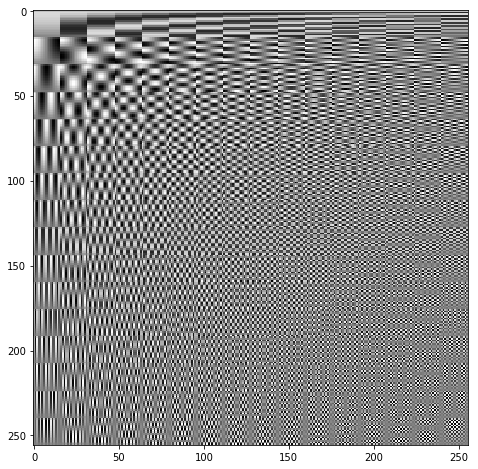

In [86]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.imshow(Adct, cmap='gray');

## References

- [_Discrete Cosine Transform_, MathWorks](https://www.mathworks.com/help/images/discrete-cosine-transform.html)